# Insurance

## Data

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Indice de masse corporelle,les poids relativement élevés ou faibles par rapport à la taille, indice objectif de poids corporel (kg/m^2) utilisant le rapport taille/poids, idéalement 18,5 à 24,9

* **children:** Nombre d'enfants couverts par l'assurance maladie / Nombre de personnes à charge

* ***smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges:** Individual medical costs billed by health insurance (Frais médicaux facturés par l'assurance maladie)

Inspiration
Can you accurately predict insurance costs?

In [40]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data.charges = data.charges.round(2)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


# EDA - Exploratory Data Analysis

In [41]:
data.describe().loc[['mean', '50%', 'max', 'min', 'std']]

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422280
50%,39.000000,30.400000,1.000000,9382.030000
max,64.000000,53.130000,5.000000,63770.430000
min,18.000000,15.960000,0.000000,1121.870000
std,14.049960,6.098187,1.205493,12110.011259


In [42]:
data.groupby('region')['charges'].agg(['mean', 'median', 'std']).reset_index()

,region,mean,median,std
0,northeast,13406.384599,10057.655,11255.802932
1,northwest,12417.575169,8965.800,11072.276880
2,southeast,14735.411484,9294.130,13971.098754
3,southwest,12346.937508,8798.590,11557.179138


### Conclusion Des Observations

Nous pouvons voir qu'aucune des regions ne degage vraiment de moyenne specifique. Même si `southeast` a la moyenne de charge la plus importante. mais aussi une `std` importante, ce qui pourrait signifier que les charges dans cette région sont moins prévisibles et varient considérablement d'une personne à l'autre. 

Nous voyons aussi que la la moyenne du `southeast` est beaucoup plus élevée que la médiane, cela peut indiquer une distribution asymétrique avec une queue plus longue vers les valeurs plus élevées. En d'autres termes, il pourrait y avoir un nombre relativement faible de charges très élevées qui font monter la moyenne.

Si nous tenons compte de `median` globale, elle tourne toutes autour de 9000-10000. La médiane est moins sensible aux valeurs extrêmes que la moyenne, donc cela pourrait indiquer que la majorité des individus dans toutes les régions paient des montants dans cette fourchette 

## Observations of charges according to Age & BMI

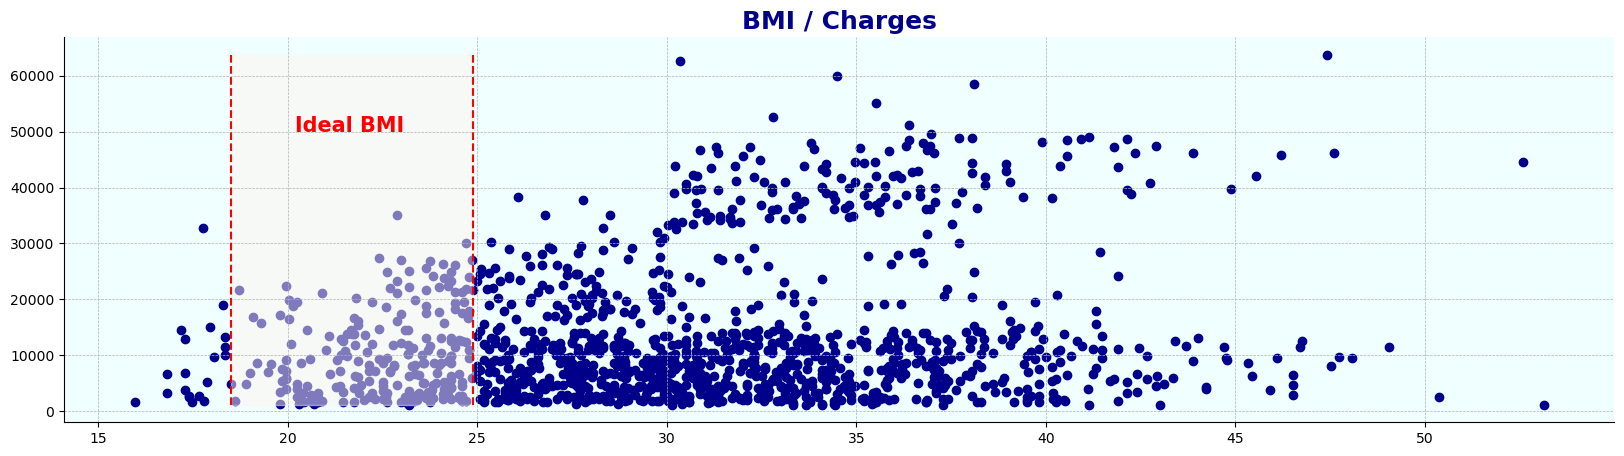

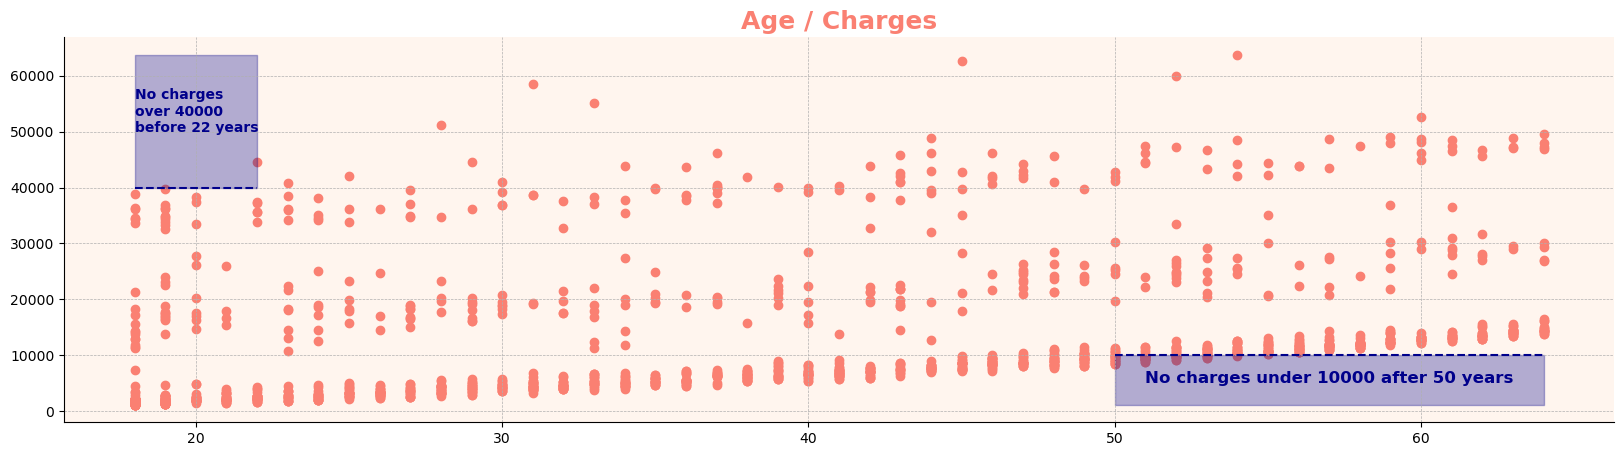

In [153]:
plt.figure(figsize=(20,5))
plt.scatter('bmi', 'charges', data = data, color = 'darkblue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, lw = 0.5, ls = '--')
plt.vlines(x= 18.5, ymin= data.charges.min(), ymax= data.charges.max(), colors='red', ls = '--')
plt.vlines(x= 24.9, ymin= data.charges.min(), ymax= data.charges.max(), colors='red', ls = '--')
plt.fill_betweenx(y = [data.charges.min(), data.charges.max()], x1= 18.5, x2=24.9, color = 'seashell', alpha = 0.5)
plt.gca().set_facecolor('azure')
plt.title('BMI / Charges', size = 18, fontweight = 'bold', c = 'darkblue')
plt.annotate('Ideal BMI', xy= (20.2, 50000), fontsize = 15, color = 'red', fontweight = 'bold')


plt.figure(figsize=(20,5))
plt.scatter('age', 'charges', data = data, color = 'salmon')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, lw = 0.5, ls = '--')
plt.hlines(y = 10000, xmin= 50, xmax= data.age.max(), color = 'darkblue', ls = '--')
plt.hlines(y = 40000, xmin= data.age.min(), xmax= 22, color = 'darkblue', ls = '--')
plt.fill_betweenx(y = [40000, data.charges.max()], x1= data.age.min(), x2=22, color = 'darkblue', alpha = 0.3)
plt.fill_betweenx(y = [data.charges.min(), 10000], x1= 50, x2= data.age.max(), color = 'darkblue', alpha = 0.3)
plt.gca().set_facecolor('seashell')
plt.annotate('No charges under 10000 after 50 years', xy= (51, 5000), fontsize = 12, color = 'darkblue', fontweight = 'bold')
plt.annotate('No charges\nover 40000\nbefore 22 years', xy= (18, 50000), fontsize = 10, color = 'darkblue', fontweight = 'bold')
plt.title('Age / Charges', size = 18, fontweight = 'bold', c  = 'salmon');

## Comparison of average charges by region & gender

In [105]:
data.groupby(['region', 'sex'])['charges'].agg(['mean', 'median']).reset_index()

,region,sex,mean,median
0,northeast,female,12953.202919,10197.770
1,northeast,male,13854.005767,9957.720
2,northwest,female,12479.870244,9614.070
3,northwest,male,12354.119317,8413.460
4,southeast,female,13499.669143,8582.300
5,southeast,male,15879.617354,9504.310
6,southwest,female,11274.411235,8530.835
7,southwest,male,13412.883865,9391.350


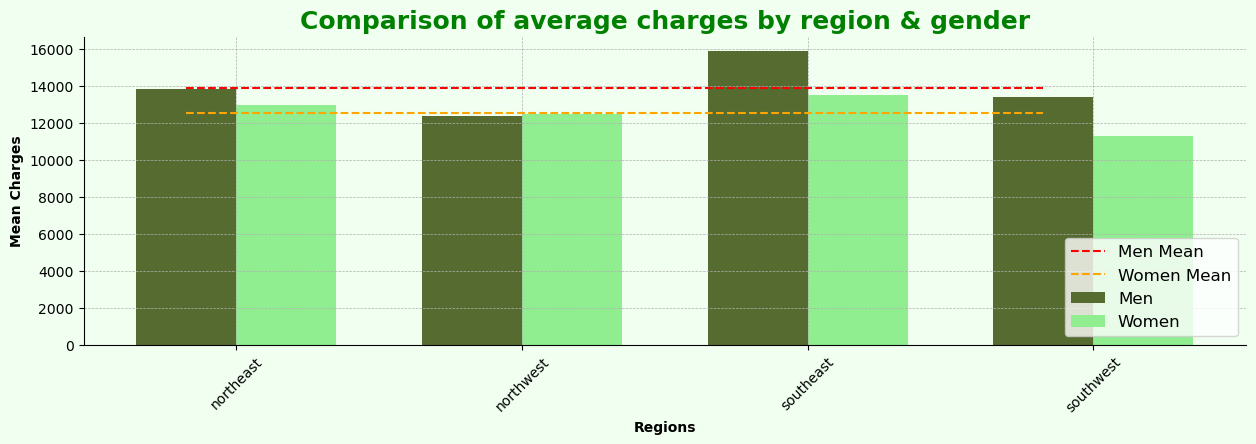

In [229]:
grouped_data = data.groupby(['region', 'sex'])['charges'].mean().reset_index()

unique_regions = grouped_data['region'].unique()
bar_width = 0.35  
index = np.arange(len(unique_regions))  

# Créer des barres pour les hommes et les femmes
bars_male = [grouped_data[(grouped_data['region'] == region) & (grouped_data['sex'] == 'male')]['charges'].values[0] for region in unique_regions]
bars_female = [grouped_data[(grouped_data['region'] == region) & (grouped_data['sex'] == 'female')]['charges'].values[0] for region in unique_regions]

plt.figure(figsize=(15, 4), facecolor = 'honeydew')
plt.bar(index, bars_male, bar_width, label='Men', color = 'darkolivegreen')
plt.bar(index + bar_width, bars_female, bar_width, label='Women', color = 'lightgreen')
plt.xlabel('Regions', fontweight = 'bold')
plt.ylabel('Mean Charges', fontweight = 'bold')
plt.title('Comparison of average charges by region & gender', size = 18, fontweight = 'bold', color = 'green')

mean_male = round(np.mean(bars_male), 2)
female_mean = round(np.mean(bars_female), 2)
plt.hlines(y = mean_male, xmin=0, xmax= len(data.region.unique()) -1, ls = '--', color = 'red', label = 'Men Mean')
plt.hlines(y = female_mean, xmin=0, xmax= len(data.region.unique()) -1, ls = '--', color = 'Orange', label = 'Women Mean')
plt.xticks(index + bar_width / 2, unique_regions)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('honeydew')
plt.xticks(rotation = 45)
plt.grid(True, lw = 0.5, ls = '--')
plt.legend(fontsize = 12, loc = 'lower right')
plt.show()

Comme nous avons pu l'observer des le debut de notre analyse, nous avons a faire a un dataset très équilibré (ce qui dans la réalité est très rarement le cas). Nous pouvons tout de même constater que dans toutes les régions, les hommes payent plus de charges que les femmes (notamment au `southeast` & `southwest`).  

## Smokers

In [243]:
data.smoker.value_counts(normalize=True) # -> Oversampling

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

Ces proportions montrent une distribution déséquilibrée entre les deux catégories.

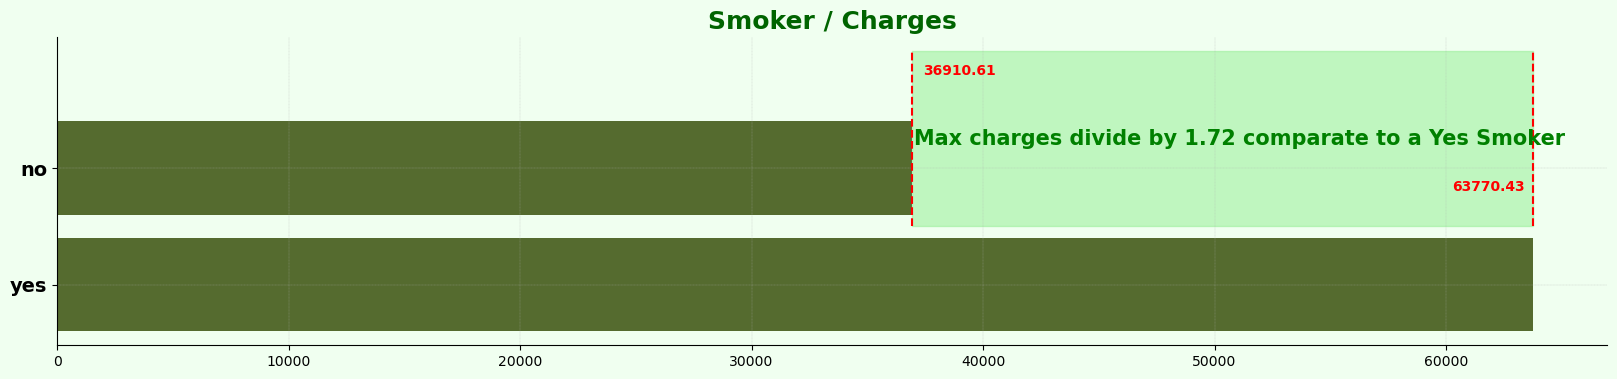

In [242]:
plt.figure(figsize=(20,4), facecolor= 'honeydew')
plt.barh(data.smoker, data.charges, color = 'darkolivegreen')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('honeydew')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.vlines(x = data.query("smoker == 'no'")['charges'].max(), ymin=0.5, ymax=2, ls = '--', color = 'red')
plt.vlines(x = data.query("smoker == 'yes'")['charges'].max(), ymin=0.5, ymax=2, ls = '--', color = 'red')
plt.fill_betweenx(y = (0.5, 2), x1= data.query("smoker == 'no'")['charges'].max(), 
                  x2= data.query("smoker == 'yes'")['charges'].max(), color = 'lightgreen', alpha = 0.5)
plt.annotate('Max charges divide by 1.72 comparate to a Yes Smoker', xy= (37000, 1.2), fontsize = 15, fontweight = 'bold', color = 'green')
plt.annotate(text = data.query("smoker == 'no'")['charges'].max(), xy= (data.query("smoker == 'no'")['charges'].max() + 500, 1.8), 
             fontsize = 10, fontweight = 'bold', color = 'red')
plt.annotate(text = data.query("smoker == 'yes'")['charges'].max(), xy= (data.query("smoker == 'yes'")['charges'].max() - 3500, 0.8), 
             fontsize = 10, fontweight = 'bold', color = 'red')
plt.grid(True, lw = 0.2, ls = '--')
plt.title('Smoker / Charges', size = 18, fontweight = 'bold', color = 'darkgreen');

# Preprocessing

In [245]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


## LabelEncoder  
### For Categorical Data

In [273]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_encoded = pd.DataFrame()
for column in ['sex', 'smoker', 'region']:
    data_encoded[column] = label.fit_transform(data[column])
    
    
data_encoded = pd.concat((data_encoded, data[['age', 'bmi', 'children', 'charges']]), axis = 1)
data_encoded.head()

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92
1,1,0,2,18,33.770,1,1725.55
2,1,0,2,28,33.000,3,4449.46
3,1,0,1,33,22.705,0,21984.47
4,1,0,1,32,28.880,0,3866.86


## MinMaxScaler
### Normalize Numercial Data (0->1)

In [278]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded)
data_final = pd.DataFrame(scaled_data, columns=data_encoded.columns)
data_final.head()

,sex,smoker,region,age,bmi,children,charges
0,0.0,1.0,1.000000,0.021739,0.321227,0.0,0.251611
1,1.0,0.0,0.666667,0.000000,0.479150,0.2,0.009636
2,1.0,0.0,0.666667,0.217391,0.458434,0.6,0.053115
3,1.0,0.0,0.333333,0.326087,0.181464,0.0,0.333010
4,1.0,0.0,0.333333,0.304348,0.347592,0.0,0.043816


## Split & Train Data

In [290]:
from sklearn.model_selection import train_test_split

X = data_final.drop('charges', axis=1)
Y = data_final['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

x_train_tensor = tf.constant(x_train.values)
x_test_tensor = tf.constant(x_test.values)
y_train_tensor = tf.constant(y_train.values)
y_test_tensor = tf.constant(y_test.values)

## Build Our Neuron Network Model

## Model 1

In [318]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)
], name= 'Model_1')

model.compile(loss= tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics= 'mae')

model.fit(x_train_tensor, y_train_tensor, epochs= 5, verbose = 1)

Epoch 1/5
34/34 [==============================] - 1s 3ms/step - loss: 0.5008 - mae: 0.5008
Epoch 2/5
34/34 [==============================] - 0s 3ms/step - loss: 0.4469 - mae: 0.4469
Epoch 3/5
34/34 [==============================] - 0s 3ms/step - loss: 0.4062 - mae: 0.4062
Epoch 4/5
34/34 [==============================] - 0s 3ms/step - loss: 0.3786 - mae: 0.3786
Epoch 5/5
34/34 [==============================] - 0s 3ms/step - loss: 0.3562 - mae: 0.3562


In [321]:
y_predict = model.predict(x_test_tensor)
mae = tf.metrics.mean_absolute_error(y_true = y_test_tensor, y_pred= y_predict)
mae_reduce = tf.reduce_mean(mae).numpy()

mse = tf.metrics.mean_squared_error(y_true = y_test_tensor, y_pred= y_predict)
mse_reduce = tf.reduce_mean(mse)
print(f'The MAE result : {mae_reduce}')
print(f'The MSE result : {mse_reduce}')

The MAE result : 0.3243997395038605
The MSE result : 0.15905186533927917


## Model 2

In [353]:
model2 = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(1)
    
], name= 'Model_2')

model2.compile(loss= tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics= 'mae')

model2.fit(x_train_tensor, y_train_tensor, epochs= 50, verbose = 0)

In [354]:
y_predict2 = model2.predict(x_test_tensor)
mae2 = tf.metrics.mean_absolute_error(y_true = y_test_tensor, y_pred= y_predict2)
mae_reduce2 = tf.reduce_mean(mae2).numpy()

mse2 = tf.metrics.mean_squared_error(y_true = y_test_tensor, y_pred= y_predict2)
mse_reduce2 = tf.reduce_mean(mse2)
print(f'The MAE result : {mae_reduce2}')
print(f'The MSE result : {mse_reduce2}')

9/9 [==============================] - 0s 2ms/step
The MAE result : 0.20735974609851837
The MSE result : 0.0847955048084259


## Model 3

In [364]:
model3 = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(50),
            tf.keras.layers.Dense(1)
    
], name= 'Model_3')

model3.compile(loss= tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics= 'mae')

result_model = model3.fit(x_train_tensor, y_train_tensor, epochs= 100, verbose = 0)

In [365]:
y_predict3 = model3.predict(x_test_tensor)
mae3 = tf.metrics.mean_absolute_error(y_true = y_test_tensor, y_pred= y_predict3)
mae_reduce3 = tf.reduce_mean(mae3).numpy()

mse3 = tf.metrics.mean_squared_error(y_true = y_test_tensor, y_pred= y_predict3)
mse_reduce3 = tf.reduce_mean(mse3)
print(f'The MAE result : {mae_reduce3}')
print(f'The MSE result : {mse_reduce3}')

9/9 [==============================] - 0s 3ms/step
The MAE result : 0.2082020342350006
The MSE result : 0.08588740229606628
